In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import rcParams, rc
from matplotlib import ticker, cm

plt.style.use('../../Paul_style.txt')
#plt.rcParams["font.family"] = "Serif"
#plt.rcParams['text.usetex'] = True


# cloud colormap
cm_name = 'devon' 
cm_file = np.loadtxt(f'../../ScientificColourMaps7/{cm_name}/{cm_name}.txt')
my_colors = mcolors.LinearSegmentedColormap.from_list(cm_name, cm_file[0:240])

In [2]:
NTAU = 50
planet_names = [#'HD189-DOGRAY',
                #'HD189-DOGRAY-ALL-CLOUDS',
                'HD189-DOGRAY-ALL-CLOUDS-COMPACT',
                'HD189-DOGRAY-NUC-CLOUDS',
                'HD189-DOGRAY-NUC-CLOUDS-COMPACT',
                #'HD189-PICKET',
                #'HD189-PICKET-ALL-CLOUDS',
                'HD189-PICKET-ALL-CLOUDS-COMPACT',
                'HD189-PICKET-NUC-CLOUDS',
                'HD189-PICKET-NUC-CLOUDS-COMPACT',
                #'HD209-DOGRAY',
                #'HD209-DOGRAY-ALL-CLOUDS',
                'HD209-DOGRAY-ALL-CLOUDS-COMPACT',
                'HD209-DOGRAY-NUC-CLOUDS',
                'HD209-DOGRAY-NUC-CLOUDS-COMPACT',
                #'HD209-PICKET',
                #'HD209-PICKET-ALL-CLOUDS',
                'HD209-PICKET-ALL-CLOUDS-COMPACT',
                'HD209-PICKET-NUC-CLOUDS',
                'HD209-PICKET-NUC-CLOUDS-COMPACT']

In [3]:
def get_optical_depth(file):
    df = pd.read_csv(file,
                     delim_whitespace=True, skiprows=0,
                     names=('lat', 'lon', 'level',
                            'alt', 'pres', 'temp', 
                            'u', 'v', 'w',
                            'aero_sw_tau_1', 'sw_asym_1', 'sw_pi0_1',
                            'aero_sw_tau_2', 'sw_asym_2', 'sw_pi0_2',
                            'aero_sw_tau_3', 'sw_asym_3', 'sw_pi0_3',
                            'aero_sw_tau_4', 'sw_asym_4', 'sw_pi0_4',
                            'aero_sw_tau_5', 'sw_asym_5', 'sw_pi0_5',
                            'aero_sw_tau_6', 'sw_asym_6', 'sw_pi0_6',
                            'aero_sw_tau_7', 'sw_asym_7', 'sw_pi0_7',
                            'aero_sw_tau_8', 'sw_asym_8', 'sw_pi0_8',
                            'aero_sw_tau_9', 'sw_asym_9', 'sw_pi0_9',
                            'aero_sw_tau_10', 'sw_asym_10', 'sw_pi0_10',
                            'aero_sw_tau_11', 'sw_asym_11', 'sw_pi0_11',
                            'aero_sw_tau_12', 'sw_asym_12', 'sw_pi0_12',
                            'aero_sw_tau_13', 'sw_asym_13', 'sw_pi0_13',
                            'haze_tau_optical_depth_per_bar', 'haze_asym', 'haze_pi0'))

    df["aero_sw_tau_1"] =  df["aero_sw_tau_1"] / df['pres']
    df["aero_sw_tau_2"] =  df["aero_sw_tau_2"] / df['pres']
    df["aero_sw_tau_3"] =  df["aero_sw_tau_3"] / df['pres']
    df["aero_sw_tau_4"] =  df["aero_sw_tau_4"] / df['pres']
    df["aero_sw_tau_5"] =  df["aero_sw_tau_5"] / df['pres']
    df["aero_sw_tau_6"] =  df["aero_sw_tau_6"] / df['pres']
    df["aero_sw_tau_7"] =  df["aero_sw_tau_7"] / df['pres']
    df["aero_sw_tau_8"] =  df["aero_sw_tau_8"] / df['pres']
    df["aero_sw_tau_9"] =  df["aero_sw_tau_9"] / df['pres']
    df["aero_sw_tau_10"] =  df["aero_sw_tau_10"] / df['pres']
    df["aero_sw_tau_11"] =  df["aero_sw_tau_11"] / df['pres']
    df["aero_sw_tau_12"] =  df["aero_sw_tau_12"] / df['pres']
    df["aero_sw_tau_13"] =  df["aero_sw_tau_13"] / df['pres']


    df = df[(df['lon'] == 0)].reset_index(drop=True)
    df = df.groupby(['lat', 'pres']).mean().reset_index()
    df["total_optical_depth"] = df["aero_sw_tau_1"] + df["aero_sw_tau_2"] + df["aero_sw_tau_3"] + df["aero_sw_tau_4"] + \
                                 df["aero_sw_tau_5"] + df["aero_sw_tau_6"] + df["aero_sw_tau_7"] + df["aero_sw_tau_8"] + \
                                 df["aero_sw_tau_9"] + df["aero_sw_tau_10"] + df["aero_sw_tau_11"] + df["aero_sw_tau_12"] + \
                                 df["aero_sw_tau_13"]

    optical_depth = df["total_optical_depth"].values.reshape(48, NTAU)
    
    
    return optical_depth

<Figure size 3600x2400 with 0 Axes>

<Figure size 2700x2400 with 0 Axes>

<Figure size 2700x2400 with 0 Axes>

<Figure size 2700x2400 with 0 Axes>

<Figure size 2700x2400 with 0 Axes>

<Figure size 2700x2400 with 0 Axes>

<Figure size 2700x2400 with 0 Axes>

<Figure size 2700x2400 with 0 Axes>

<Figure size 2700x2400 with 0 Axes>

<Figure size 2700x2400 with 0 Axes>

<Figure size 2700x2400 with 0 Axes>

<Figure size 2700x2400 with 0 Axes>

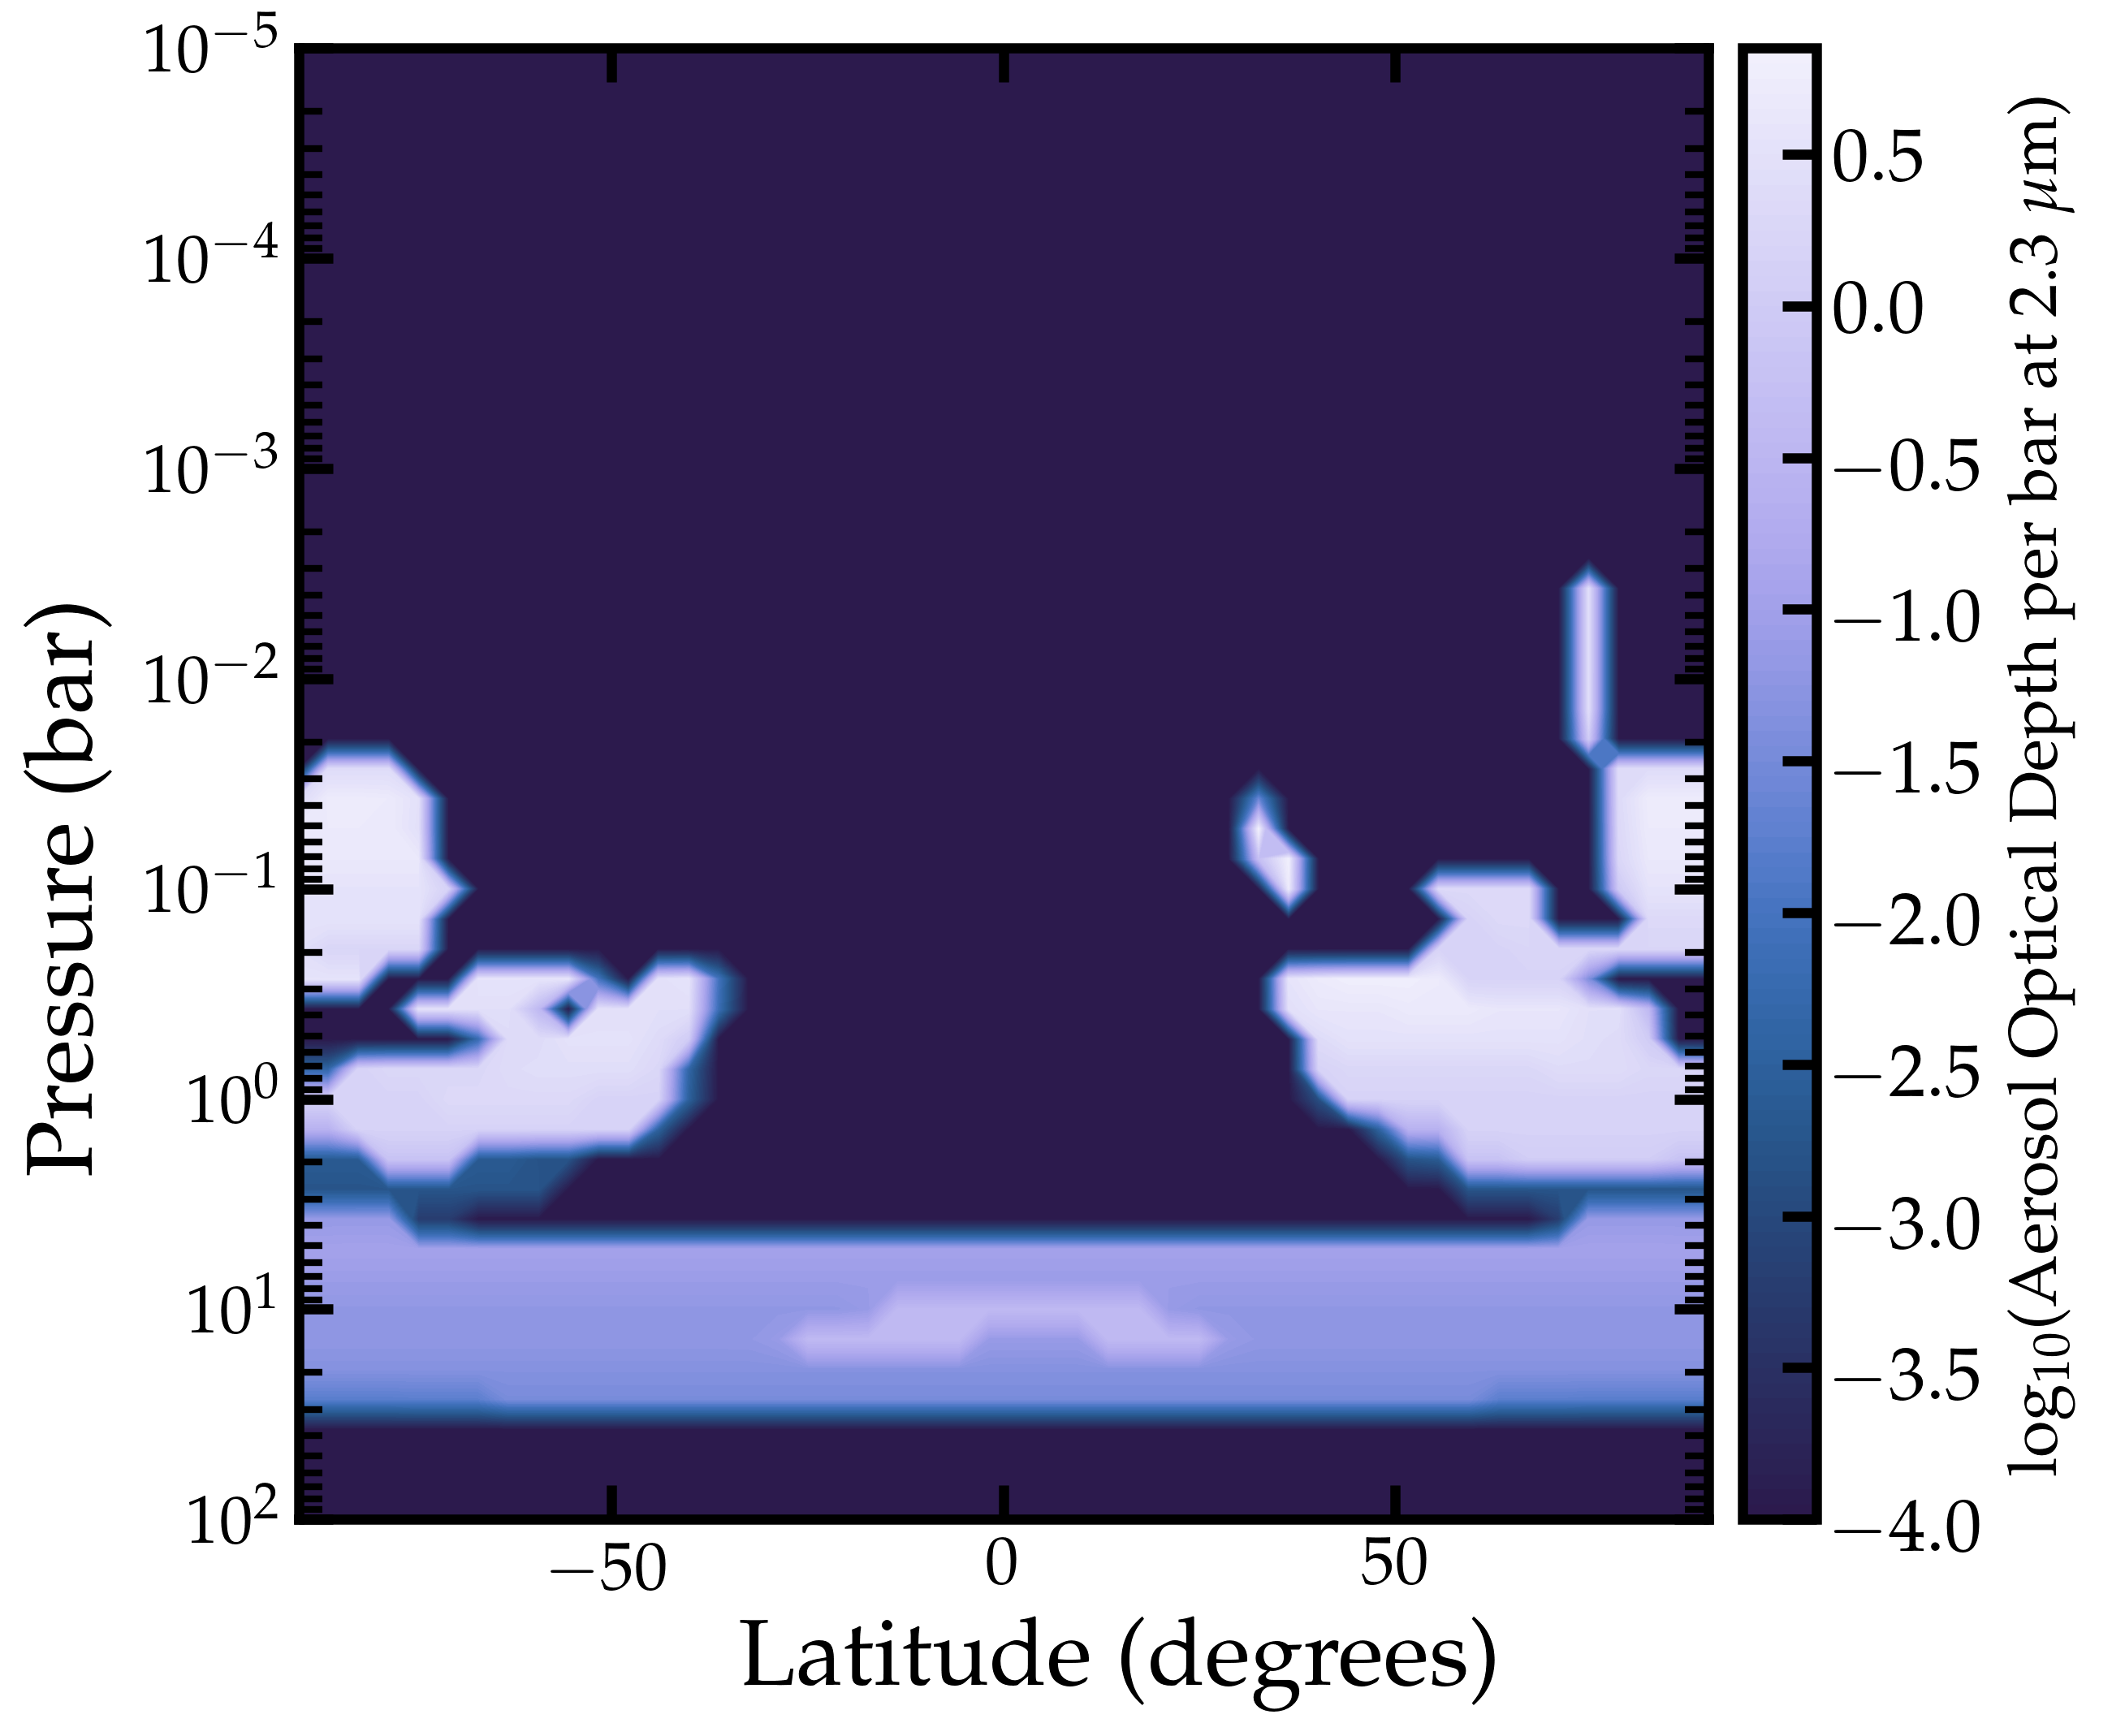

In [4]:
for i in range(len(planet_names)): 
    plt.clf()

    planet_name = planet_names[i]
    file1 = '../Spectral-Processing/GCM-OUTPUT/' + planet_name + '_with_clouds_and_wavelength_dependence.txt'

    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9,8), sharex=True, sharey=True)
    plt.subplots_adjust(wspace=0.02, hspace=0.1)

    lats = np.linspace(-90, 90, 48)
    pressures = np.logspace(-5, 2, NTAU)

    optical_depths1 = get_optical_depth(file1)

    optical_depths1[optical_depths1 < 1e-4] = 1e-4
    # , levels=np.linspace(-4,3,15)

    mp1 = axes.contourf(lats, pressures, np.log10(optical_depths1.T), cmap=my_colors, levels=100)

    axes.set_yscale("log")
    axes.set_ylim(1e2, 1e-5)

    #cbar = fig.colorbar(mp1, ax=axes.ravel().tolist(), location='top', aspect=50, pad=0.02)
    cbar = fig.colorbar(mp1, aspect=20, pad=0.02)
    cbar.set_label(r'log$_{10}$(Aerosol Optical Depth per bar at 2.3 $\mu$m)', size=20, labelpad=10)
    cbar.ax.tick_params(labelsize=22)  # set your label size here

    fig.text(0.5, 0.04, r"Latitude (degrees)", size=28, ha='center')
    fig.text(0.0, 0.45, r"Pressure (bar)", size=28, va='center', rotation='vertical')

    #fig.text(0.14, 0.15, r"Lon = 0$^{\circ}$", size=20, color='white')
    #fig.text(0.40, 0.15, r"Lon = 120$^{\circ}$", size=20, color='white')
    #fig.text(0.66, 0.15, r"Lon = 240$^{\circ}$", size=20, color='white')


    plt.savefig('../Figures/Aerosol_Maps_{}.png'.format(planet_name), bbox_inches='tight', dpi=250)